---
### Download historical stock market data via `yfinance` lib
source : https://www.kaggle.com/code/jacksoncrow/download-nasdaq-historical-data/notebook

---

In [45]:
# ! pip install yfinance

In [1]:
import os, contextlib
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import yfinance as yf

In [2]:
only_sp500 = True  # only download data for S&P500

## Download traded symbols/tickers

In [252]:
if only_sp500:
    # list of companies with largest market caps
    SP500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
    symbols = SP500['Symbol'].tolist()    
else:
    # download all NASDAQ traded symbols
    data = pd.read_csv("http://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt", sep='|')
    data_clean = data[data['Test Issue'] == 'N']
    symbols = data_clean['NASDAQ Symbol'].tolist()

print('total number of symbols traded = {}'.format(len(symbols)))

total number of symbols traded = 504


In [254]:
print(symbols)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'AIG', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', '

In [138]:
# data = pd.read_csv("http://www.nasdaqtrader.com/dynamic/SymDir/nasdaqtraded.txt", sep='|')
# data = data[data['Test Issue'] == 'N']
data

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAA,Listed Funds Trust AAF First Priority CLO Bond...,P,,Y,100.0,N,NaN,AAA,AAA,N
3,Y,AAAU,Goldman Sachs Physical Gold ETF Shares,Z,,Y,100.0,N,NaN,AAAU,AAAU,N
4,Y,AAC,Ares Acquisition Corporation Class A Ordinary ...,N,,N,100.0,N,NaN,AAC,AAC,N
...,...,...,...,...,...,...,...,...,...,...,...,...
12141,Y,ZWS,Zurn Water Solutions Corporation Common Stock,N,,N,100.0,N,NaN,ZWS,ZWS,N
12146,Y,ZY,Zymergen Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZY,N
12147,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
12148,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


## Configs

In [39]:
if only_sp500:
    offset = 0       # start index in the list "symbols"
    limit = len(symbols)  # only symbols[offset:offset+limit] downloaded
    period = 'max'   # 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    interval = '1d'  # 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
else:
    offset = 0       
    limit = 3000     
    period = 'max'   
    interval = '1d'
    
if interval == '1h':
    assert period == '730d'
    
if interval == '2m':
    assert period == '60d'

In [40]:
interval = '2m'
period = '60d'

In [199]:
# create download direc
# ! mkdir -p ../../../../data/stock/day
# ! mkdir -p ../../../../data/stock/minute

In [ ]:
os.makedirs(exist_ok=True)

## Download Historic data

In [46]:
limit = limit if limit else len(symbols)
end = min(offset + limit, len(symbols))
is_valid = [False] * len(symbols)
# force silencing of verbose API
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        pbar = tqdm(range(offset, limit), ncols=650)
        for i in pbar:
            s = symbols[i]
            data = yf.download(s, period=period, interval=interval)
            orig_size = len(data)
            data.dropna(inplace=True)   # instead of imputing, we drop rows with NaNs
            if not len(data):
                continue
            is_valid[i] = True
            pbar.set_description(f'[keeping {s} {(len(data)*100)//orig_size}%] \t  [total valid symbols = {sum(is_valid)}]  ')
            data.index.names = ['date']
            data.reset_index(inplace=True)
            data.columns = map(str.lower, data.columns)
            data.sort_values(by='date', inplace=True)
            # data.to_csv('./stock_data/day/{}.csv'.format(s))
            # data.to_csv('../../../../data/stock/minute/{}.csv'.format(s))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

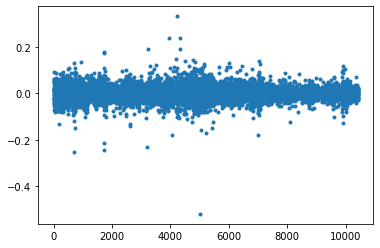

In [3]:
data = yf.download('aapl', period="max", interval="1d", end='2022-04-20')
# data = yf.download('aapl', period="730d", interval="1h")
# data = yf.download('aapl', period="60d", interval="2m")
data.dropna(inplace=True) 
data.index.names = ['date']
data['return'] = data['Close'].pct_change()
data.reset_index(inplace=True)
data.columns = map(str.lower, data.columns)
data.sort_values(by='date', inplace=True)

# print(data)
# data['close'].diff().plot(style='.')
data['close'].pct_change().plot(style='.')
# np.log(data['close']).plot(style='-')
# data['close'].diff().plot(style='-')

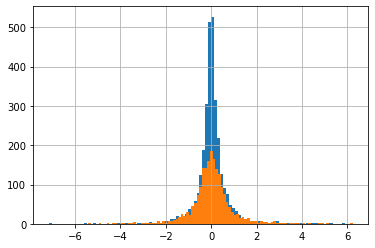

In [262]:
data['close'].diff().dropna()[:-2000].hist(bins=100)
data['close'].diff().dropna()[-2000:].hist(bins=100)

# data['close'].pct_change().dropna()[:-2000].hist(bins=100)
# data['close'].pct_change().dropna()[-2000:].hist(bins=100)

[5093, 2547, 5093]


'TODO: what happens when we take fft of first window and then invert it on a future window? - this might explain ssm'

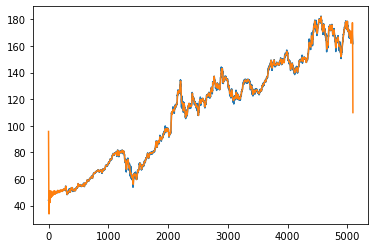

In [276]:
# change: truncation doesn't work well on change
# high: truncation mostly does well except on end points
l = data.close
# l = data['close'].pct_change().dropna()
# l = data['close'].diff().dropna()
fourier = np.fft.rfft(l)  
l_ = np.fft.irfft(fourier[:300], n=len(l)).real
print([len(x) for x in (l, fourier, l_)])
# np.isclose(l,l_).all()
plt.plot(l)
plt.plot(l_)#, '--', lw=2)

'''TODO: what happens when we take fft of first window and then invert it on a future window? - this might explain ssm'''

/dccstor/comp-gen/ag1988/miniconda3/envs/torch17/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


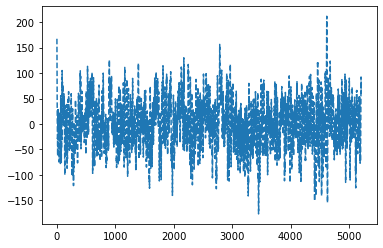

In [224]:
plt.plot(np.fft.rfft(l), '--')
# plt.plot(np.fft.fft(l).imag)
# plt.plot(np.fft.rfft(l).imag, '--')

In [228]:
np.random.rand(1).clip(min=2)

array([2.])

/dccstor/comp-gen/ag1988/miniconda3/envs/torch17/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


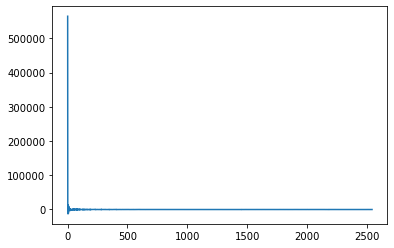

In [36]:
plt.plot(np.fft.rfft(data.high))

In [30]:
def cutoff_dates(all_dates, split_sizes=[0.95,.025,.025]):
    """ Determines dates for a temporal split according to split_sizes.
        all_dates: list of dataframes with a 'date' column.
        returns date ranges for train, val, test.
    """
    all_dates = pd.concat(all_dates)
    all_dates['date'] = pd.to_datetime(all_dates['date'])
    all_dates.sort_values(by=['date'], inplace=True, ascending=True)
    all_dates.reset_index(drop=True, inplace=True)
    n = len(all_dates)
    # train - val - test
    train_start = 0
    train_end = val_start = train_start + int(n * split_sizes[0])  # excl                           
    val_end = test_start = val_start + int(n * split_sizes[1])
    test_end = min(test_start + int(n * split_sizes[2]), n-1)
    
    date_start = [all_dates.date.iloc[idx] for idx in [train_start, val_start, test_start]]
    date_end = [all_dates.date.iloc[idx] for idx in [train_end, val_end, test_end]]
    
    return date_start, date_end

In [33]:
# cutoffs = cutoff_dates(all_dates)

In [59]:
# import glob

# all_dates = []
data = []
for file_path in sorted(glob.glob(f'../../../../data/stock/day/*.csv'))[:1]:
    df_raw = pd.read_csv(file_path)
    assert not df_raw.isnull().any().any(), 'data should already be imputed'
    # all_dates.append(df_raw[["date"]].copy())
    data.append(df_raw)
    
data = data[0]

In [69]:
data[3:4]

,Unnamed: 0,date,open,high,low,close,adj close,volume
3,3,1999-11-23,30.400572,31.205294,28.612303,28.612303,24.567413,5975611


In [67]:
# data['date'] = pd.to_datetime(data['date'])
for i in range(3):
    print(pd.to_datetime(data['date']).between(cutoffs[0][i], cutoffs[1][i], inclusive='left').sum())
    
5234 + 203 + 202

5234
203
202


5639

In [72]:
import torch
from torch.utils.data import Dataset, ConcatDataset, DataLoader

In [76]:
# import torch
# from torch.utils.data import Dataset, ConcatDataset, DataLoader

def load_raw_data(root_path, max_num_stocks=-1):
    """ root_path: path to dir containing cleaned .csv's
        returns a list of df's
    """
    files = sorted(glob.glob(f'{root_path}/*.csv'))
    files = files[:max_num_stocks] if max_num_stocks > 0 else files
    dfs_raw = []
    
    pbar = tqdm(files)
    for file_path in pbar:
        df_raw = pd.read_csv(file_path)
        assert not df_raw.isnull().any().any(), 'data should already be imputed'
        dfs_raw.append(df_raw)
        pbar.set_description(f'{os.path.basename(file_path)}')
    
    assert len(dfs_raw)
    return dfs_raw


def cutoff_dates(all_dates, split_sizes=[0.9,.05,.05]):
    """ Determines dates for a temporal split according to split_sizes.
        all_dates: list of dataframes with a 'date' column.
        returns date ranges for train, val, test.
    """
    all_dates = pd.concat(all_dates)
    all_dates['date'] = pd.to_datetime(all_dates['date'])
    all_dates.sort_values(by=['date'], inplace=True, ascending=True)
    all_dates.reset_index(drop=True, inplace=True)
    n = len(all_dates)
    # train - val - test
    train_start = 0
    train_end = val_start = train_start + int(n * split_sizes[0])  # excl                           
    val_end = test_start = val_start + int(n * split_sizes[1])
    test_end = min(test_start + int(n * split_sizes[2]), n-1)

    date_start = [all_dates.date.iloc[idx] for idx in [train_start, val_start, test_start]]
    date_end = [all_dates.date.iloc[idx] for idx in [train_end, val_end, test_end]]

    return date_start, date_end


def time_features(dates, freq="t"):
    """
    > `time_features` takes in a `dates` dataframe with a 'date' column and extracts the date down to `freq` where freq can be any of the following:
    > * m - [year, month]
    > * w - [year, month]
    > * d - [year, month, day, weekday]
    > * b - [year, month, day, weekday]
    > * h - [year, month, day, weekday, hour]
    > * t - [year, month, day, weekday, hour, minute]    
    """
    dates['date'] = pd.to_datetime(dates['date'])
    dates["year"] = dates.date.apply(lambda row: row.year, 1)
    dates["month"] = dates.date.apply(lambda row: row.month, 1)
    dates["day"] = dates.date.apply(lambda row: row.day, 1)
    dates["weekday"] = dates.date.apply(lambda row: row.weekday(), 1)
    dates["hour"] = dates.date.apply(lambda row: row.hour, 1)
    dates["minute"] = dates.date.apply(lambda row: row.minute, 1)
    freq_map = {
        "y": ["year"],
        "m": ["year", "month"],
        "w": ["year", "month"],
        "d": ["year", "month", "day", "weekday"],
        "b": ["year", "month", "day", "weekday"],
        "h": ["year", "month", "day", "weekday", "hour"],
        "t": ["year", "month", "day", "weekday", "hour", "minute"],
    }
    return dates[freq_map[freq.lower()]]


class StandardScaler:
    def __init__(self, epsilon=1e-5):
        self.mean = 0.0
        self.std = 1.0
        self.epsilon = epsilon

    def fit(self, data):
        self.mean = data.mean(0)
        self.std = data.std(0).clip(min=self.epsilon)

    def transform(self, data):
        mean = (
            torch.from_numpy(self.mean).type_as(data).to(data.device)
            if torch.is_tensor(data)
            else self.mean
        )
        std = (
            torch.from_numpy(self.std).type_as(data).to(data.device)
            if torch.is_tensor(data)
            else self.std
        )
        return (data - mean) / std

    def inverse_transform(self, data):
        mean = (
            torch.from_numpy(self.mean).type_as(data).to(data.device)
            if torch.is_tensor(data)
            else self.mean
        )
        std = (
            torch.from_numpy(self.std).type_as(data).to(data.device)
            if torch.is_tensor(data)
            else self.std
        )
        return (data * std) + mean


class StockDataset(Dataset):
    def __init__(
        self,
        cutoffs,                     # datetime ranges (temporal split)
        flag="train",                # data split
        size=None,                   # [context_len, pred_len]            
        target="close",
        mode='diff',                 # instead of predicting target, forecast difference from most recent target
        freq="t",
        cols=['year', 'month', 'day', 'weekday', 'hour', 'minute', 
              'high', 'low', 'open', 'close', 'volume', 'return'], # numeric features used for prediction
    ):
        # size [seq_len, pred_len]
        if size == None:
            self.seq_len = 512-7
            self.pred_len = 7
        else:
            self.seq_len = size[0]
            self.pred_len = size[-1]
        
        type_map = {"train": 0, "val": 1, "test": 2}
        self.set_type = type_map[flag]
        
        self.cutoffs = cutoffs     
        self.target = target
        self.mode = mode
        self.freq = freq
        self.cols = cols
    
    def process_columns(self, df_raw):
        # some other targets that might generalize better
        close = df_raw['close']
        prev_close = close.shift()
        df_raw['return'] = (close - prev_close) / prev_close.clip(lower=1e-4)
        df_raw = df_raw.dropna(inplace=True)
        
        # incude time info
        df_time = time_features(df_raw[["date"]].copy(), freq=self.freq)
        df_raw = pd.concat([df_raw, df_time], axis=1)
                
        # select features
        cols = self.cols.copy()
        cols.remove(self.target)
        return df_raw[cols + [self.target]]
    
    def borders(self, df):
        start_date, end_date = self.cutoffs
        num_train, num_val, num_test = [
            pd.to_datetime(df['date']).between(start_date[i], end_date[i], inclusive='left').sum() 
            for i in range(3)
        ]
        # temporal split : [train, val, test]
        start_idx = [0,         num_train - self.seq_len, len(df_raw) - num_test - self.seq_len]
        end_idx =   [num_train, num_train + num_val,      len(df_raw)]
        return start_idx, end_idx
    
    def get_split_data(self, df, set_type=0):
        border1s, border2s = self.borders(df)
        border1 = border1s[set_type]    # split start 
        border2 = border2s[set_type]    # split end
        return df[border1 : border2]
        
    def prepare_data(self, df, scalar=None):
        df_data = self.get_split_data(df, self.set_type)
        
        if scaler is not None:
            data = scaler.transform(df_data.values)
        else:
            data = df_data.values
        
        self.data_x = data           # input
        self.data_y = data[:, -1:]   # target : rightmost col

    def __getitem__(self, index):
        # seq_x: sb -----sl----------- se 0 ---pl--- 0
        #                      seq_y:  se   ---pl--- re
        s_begin = index
        s_end = s_begin + self.seq_len
        r_end = s_end + self.pred_len

        seq_x = self.data_x[s_begin:s_end]
        seq_x = np.concatenate(
            [seq_x, np.zeros((self.pred_len, self.data_x.shape[-1]))], axis=0
        )
        
        if self.mode == 'diff':        
            assert self.target in self.cols
            # difference from last known target
            seq_y = self.data_y[s_end:r_end] - self.data_y[s_end-1]
        else:
            seq_y = self.data_y[s_end:r_end]
        
        seq_x = seq_x.astype(np.float32)
        seq_y = seq_y.astype(np.float32)
        
        return torch.tensor(seq_x), torch.tensor(seq_y)  # [sl+pl,features], [pl,1]

    def __len__(self):
        return len(self.data_x) - self.seq_len - self.pred_len + 1

    def inverse_transform(self, data, scalar):
        return scaler.inverse_transform(data)

    @property
    def d_input(self):
        return self.data_x.shape[-1]

    @property
    def d_output(self):
        return self.data_y.shape[-1]

    
class StocksDataset(ConcatDataset):
    def __init__(self, dfs_raw, **kwargs):
        split = kwargs['flag']
        
        # determine datetime ranges for a temporal data split
        cutoffs = cutoff_dates([dfs_raw[['date']] for df in dfs_raw])
        
        # add additional features
        stock = StockDataset(cutoffs, **kwargs)
        dfs_raw = list(map(stock.process_columns, dfs_raw))
        
        # train a scalar
        train_data = pd.concat([stock.get_split_data(df, 0) for df in dfs_raw])
        scaler = StandardScaler()
        scaler.fit(train_data.values)
        
        datasets = []
        for df in tqdm(dfs_raw, desc=f"{split}"):
            try:
                ds = StockDataset(cutoffs, **kwargs)
                ds.prepare_data(df, scalar)
                if not len(ds): continue
            except ValueError:
                continue
            datasets.append(ds)  
            # note: its possible a stock can appear in train but not in test
        
        super().__init__(datasets)
        print(f'\n {split} set size : {len(self)} \n'.upper())
    
    @property
    def d_input(self):
        return self.datasets[0].d_input

    @property
    def d_output(self):
        return self.datasets[0].d_output
    
    @property
    def pred_len(self):
        return self.datasets[0].pred_len



class Temp:
    def __init__(self):
        
        init_defaults = {
            "data_dir": '../../../../data/stock/day/',
            "max_num_stocks": 10,
            "size": [512-7],   # next 7d forecast based on past 505d
            "target": "close",
            "scale": True,
            "mode": 'diff',
            "freq": "t",
            "cols": ['year', 'month', 'day', 'weekday', 'high', 'low', 'open', 'close', 'volume', 'return'],
        }
        
        self.__dict__.update(init_defaults)
        
        # load cleaned data
        dfs_raw = load_raw_data(self.data_dir, self.max_num_stocks)
        
        
        self.dataset_train = self._dataset_cls(
            dfs_raw,
            flag="train",
            size=self.size,
            target=self.target,
            scale=self.scale,
            mode=self.mode,
            freq=self.freq,
            cols=self.cols,
        )

        return 
    
        self.dataset_val = self._dataset_cls(
            dfs_raw,
            flag="val",
            size=self.size,
            target=self.target,
            scale=self.scale,
            mode=self.mode,
            freq=self.freq,
            cols=self.cols,
        )

        self.dataset_test = self._dataset_cls(
            dfs_raw,
            flag="test",
            size=self.size,
            target=self.target,
            scale=self.scale,
            mode=self.mode,
            freq=self.freq,
            cols=self.cols,
        )

Temp()


      Unnamed: 0        date        open        high         low       close  \
0              0  1999-11-18   32.546494   35.765381   28.612303   31.473534   
1              1  1999-11-19   30.713518   30.758226   28.478184   28.880545   
2              2  1999-11-22   29.551144   31.473534   28.657009   31.473534   
3              3  1999-11-23   30.400572   31.205294   28.612303   28.612303   
4              4  1999-11-24   28.701717   29.998213   28.612303   29.372318   
...          ...         ...         ...         ...         ...         ...   
5635        5635  2022-04-12  131.690002  132.190002  125.029999  125.389999   
5636        5636  2022-04-13  125.260002  128.529999  124.910004  128.289993   
5637        5637  2022-04-14  128.419998  128.960007  125.570000  126.440002   
5638        5638  2022-04-18  126.440002  126.750000  123.129997  123.839996   
5639        5639  2022-04-19  123.709999  126.830002  123.699997  126.529999   

       adj close    volume  
0      27